<a href="https://colab.research.google.com/github/sriganeshmic/Advanced-Time-Series-Forecasting-with-Deep-Learning-and-Attention-Mechanisms/blob/main/CANCER_DISEASE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [134]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Save to CSV
df.to_csv('breast_cancer_dataset.csv', index=False)

print("✓ Dataset loaded successfully!")
print(f"Shape: {df.shape}")

✓ Dataset loaded successfully!
Shape: (569, 31)


In [135]:
# Complete Cancer Prediction with EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [136]:
# 1. LOAD DATASET
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target


In [137]:
# 2. EXPLORATORY DATA ANALYSIS
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nTarget Distribution:")
print(df['target'].value_counts())

Dataset Shape: (569, 31)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null   

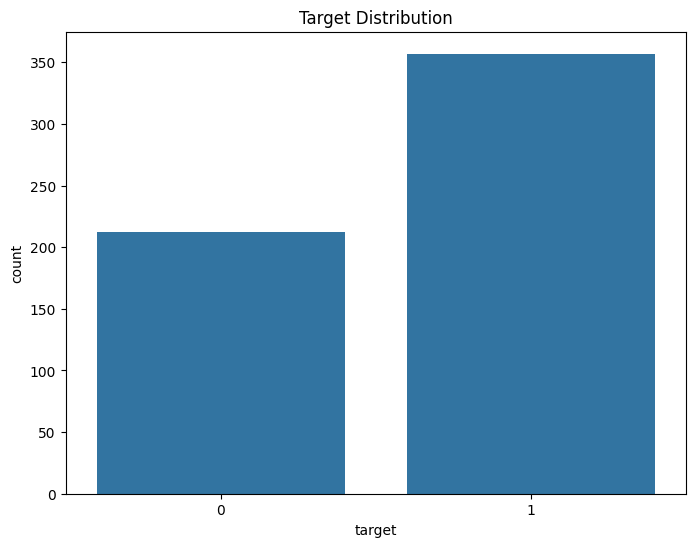

In [138]:
# 3. VISUALIZATIONS
# Target distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Target Distribution')
plt.savefig('target_dist.png')

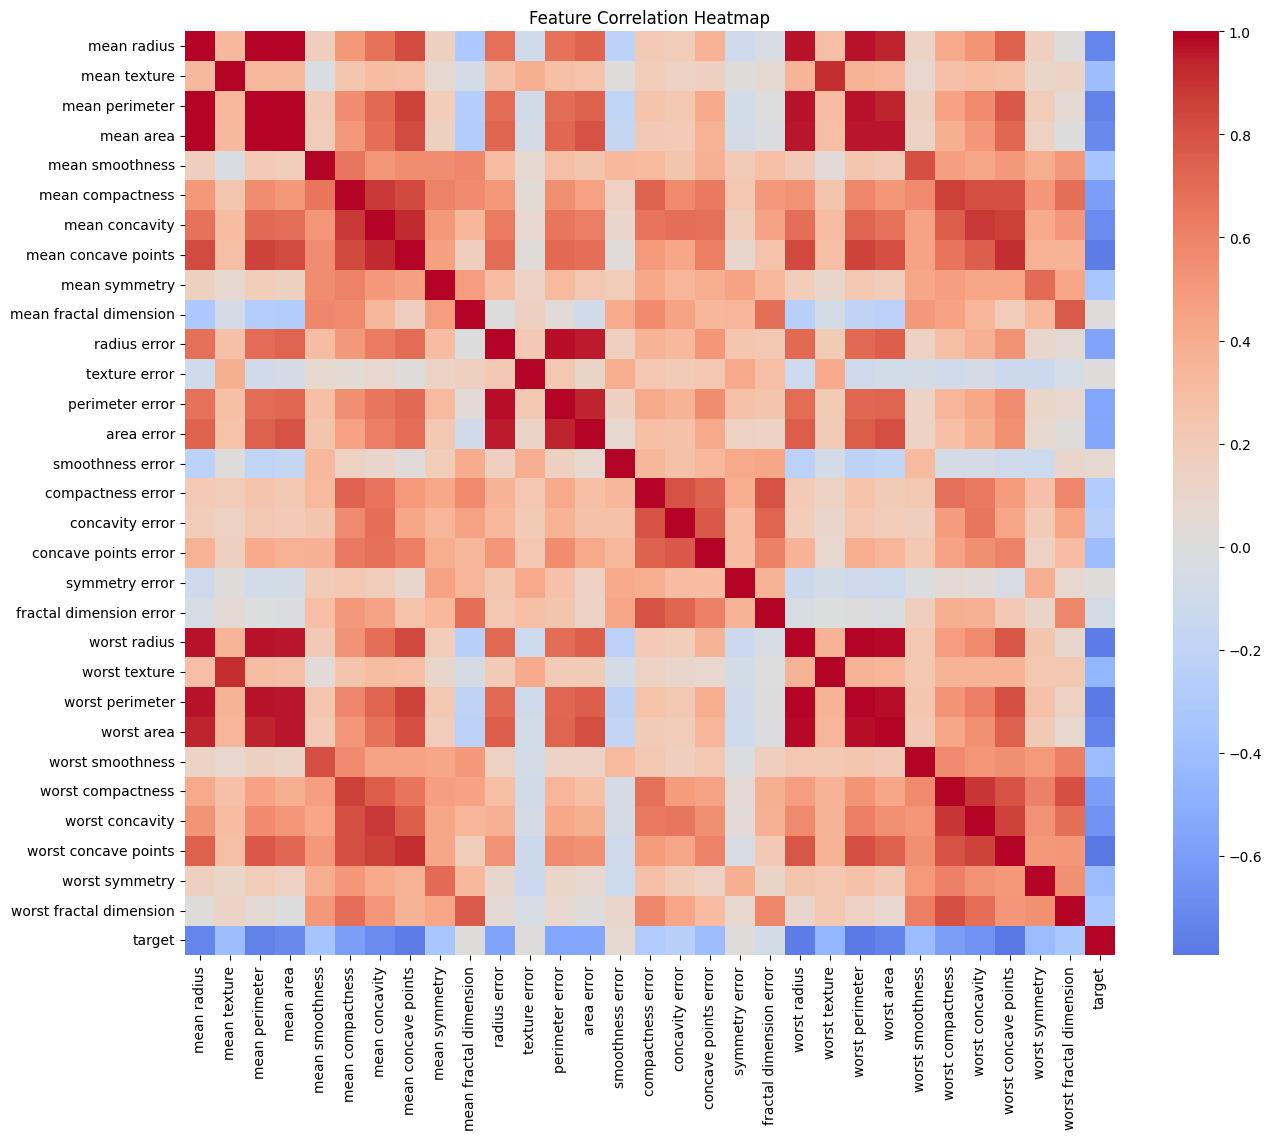

In [127]:
# Correlation heatmap
plt.figure(figsize=(15, 12))
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.savefig('correlation.png')

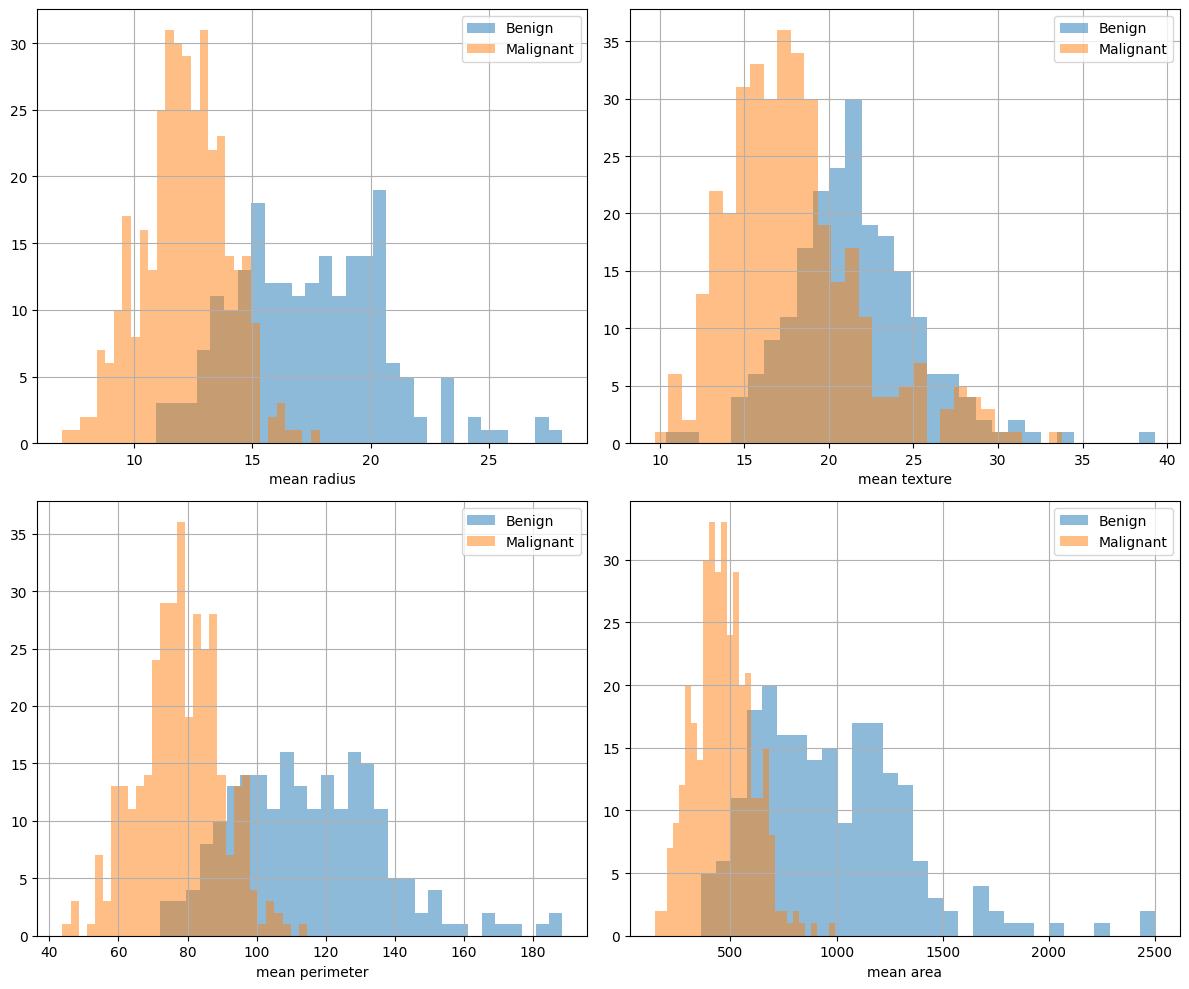

In [128]:
# Feature distributions
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area']
for idx, feature in enumerate(features):
    ax = axes[idx//2, idx%2]
    df[df['target']==0][feature].hist(ax=ax, alpha=0.5, label='Benign', bins=30)
    df[df['target']==1][feature].hist(ax=ax, alpha=0.5, label='Malignant', bins=30)
    ax.set_xlabel(feature)
    ax.legend()
plt.tight_layout()
plt.savefig('feature_dist.png')

In [129]:
# 4. DATA PREPROCESSING
X = df.drop('target', axis=1)
y = df['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [130]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [131]:
# 5. MODEL TRAINING & EVALUATION
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(50, 30), max_iter=1000)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

    print(f"\n{'='*50}")
    print(f"{name}")
    print(f"{'='*50}")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))


Logistic Regression
Accuracy: 0.9737

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Confusion Matrix:
[[41  2]
 [ 1 70]]

Random Forest
Accuracy: 0.9649

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114


Confusion Matrix:
[[40  3]
 [ 1 70]]

SVM
Accuracy: 0.9825

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        

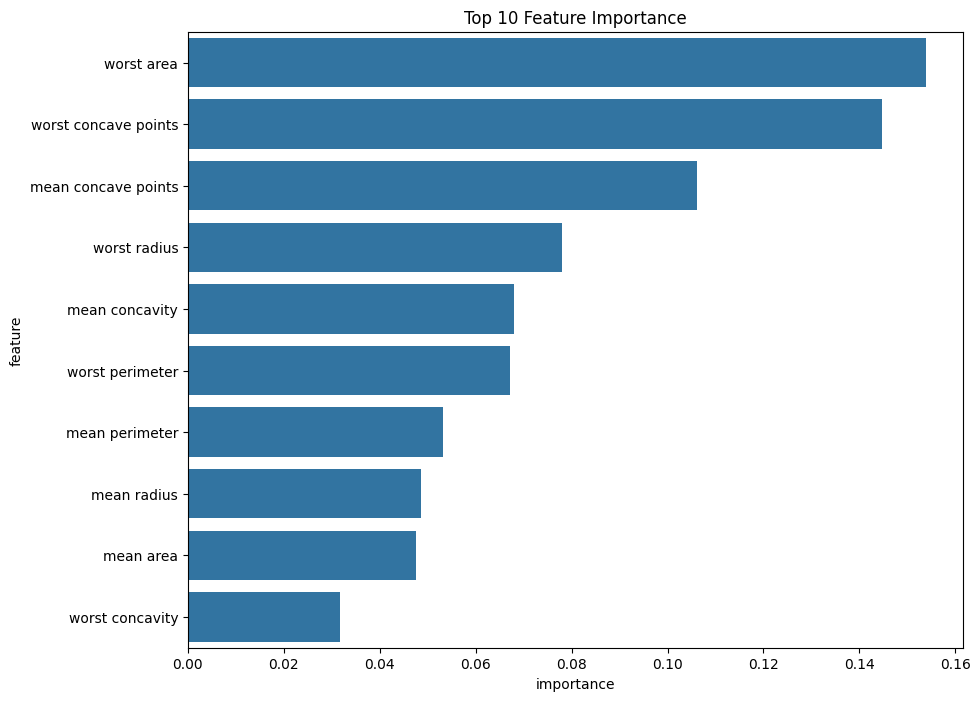

In [132]:
# 6. FEATURE IMPORTANCE (Random Forest)
rf_model = models['Random Forest']
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(10))
plt.title('Top 10 Feature Importance')
plt.savefig('feature_importance.png')

In [133]:
# 7. RESULTS SUMMARY
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)
for model, acc in sorted(results.items(), key=lambda x: x[1], reverse=True):
    print(f"{model}: {acc:.4f}")

print("\nBest Model:", max(results, key=results.get))
print(f"Best Accuracy: {max(results.values()):.4f}")


MODEL COMPARISON
SVM: 0.9825
Logistic Regression: 0.9737
Random Forest: 0.9649
Neural Network: 0.9649

Best Model: SVM
Best Accuracy: 0.9825
